**Bài tập về nhà:**

a) Hãy chọn giá trị n lớn hơn 100 khác nhau và chạy các thống kê ở trên để đưa ra kết luận.



In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 18})

In [8]:
gia_nha_dat_us = pd.read_csv("gia_nha_dat_us.csv")
gia_nha_dat_us.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df = gia_nha_dat_us[['MSSubClass', 'MSZoning', 'LotArea', 'SalePrice']]
df.head()

,MSSubClass,MSZoning,LotArea,SalePrice
0,60,RL,8450,208500
1,20,RL,9600,181500
2,60,RL,11250,223500
3,70,RL,9550,140000
4,60,RL,14260,250000


In [12]:
# Engineering feature: log transform #
data = df['SalePrice']
# Sử dụng ln(1+r) ~ r để tránh rate of change #
data = np.log1p(data)
# Lay ngau nhien N diem du lieu
while True:
    n = int(input('Nhập N: ')) # tối đa chỉ thử đc ngang 500, nếu lớn hơn thì chạy rất lâu mới ra kết quả
    if n > 100:
        sample = data.sample(n=n)
        print(sample)
    break

Nhập N: 300
778     11.877576
901     11.938200
561     12.043560
1276    11.995358
149     11.652696
          ...    
748     12.469978
648     11.951187
1240    12.323416
1137    11.451061
970     11.813037
Name: SalePrice, Length: 300, dtype: float64


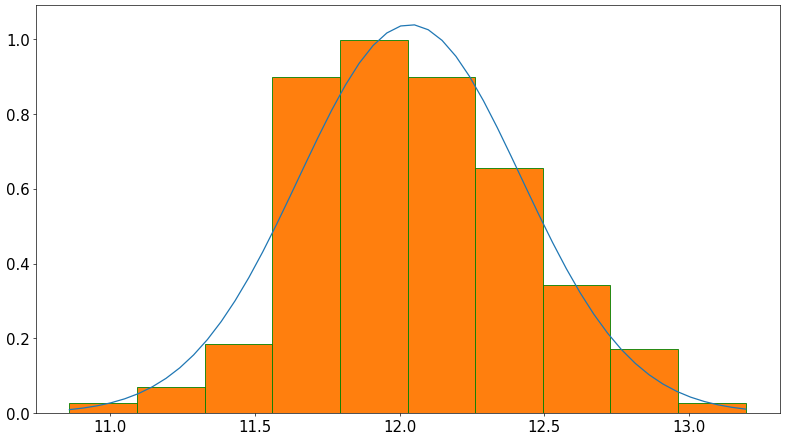

In [13]:
# Kiem tra data co chuan hay khong?
mean = np.mean(sample)
# ddof=1 :: hiệu chỉnh
std = np.std(sample, ddof=1)
domain = np.linspace(np.min(sample), np.max(sample))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(sample, edgecolor='green', density=True)
plt.show()

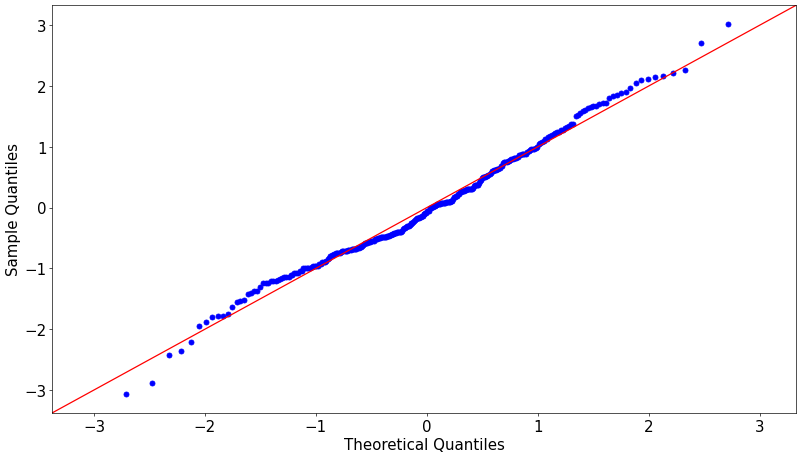

In [14]:
import statsmodels.api as sm
# Đưa dữ liệu về dạng chuẩn tắc #
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

sm.qqplot(standadize(sample), line ='45')
plt.show()

In [15]:
my_mean = 150000
my_log_mean = np.log1p(my_mean)
print(my_log_mean)

11.918397239722838


Giả thiết thống kê:

H0: $\mu = 11.918397239722838$

H1: $\mu \ne 11.918397239722838$

In [16]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
           p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
           p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [17]:
from scipy.stats import ttest_1samp
p = {}
p['mean1'] = np.mean(sample) # mu
p['mean2'] = my_log_mean # mu_0
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='two-sided')
print(f' kết quả khi N = {len(sample)}')
print(results(p))

 kết quả khi N = 300
      mean1      mean2     score       p_value  \
  12.035884  11.918397  5.301901  2.231281e-07   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  


**a) Kiểm định 2 phía:**  khi mẫu càng lớn thì p_value càng dần tiến đến 0. Kết luận dần tiến về phía chấp nhận H1

In [18]:
p1 = {}
p1['mean1'] = np.mean(sample)
p1['mean2'] = my_log_mean
p1['score'], p1['p_value'] = ttest_1samp(sample, my_log_mean, alternative='less')
print(f' kết quả khi N = {len(sample)}')
print(results(p1))

 kết quả khi N = 300
      mean1      mean2     score  p_value                            KetLuan
  12.035884  11.918397  5.301901      1.0  Chấp nhận H0 với mức ý nghĩa 0.05


**Kiểm định 1 phía (trái):** khi mẫu càng lớn thì p_value càng dần tiến đến 1. Kết luận dần tiến về phía chấp nhận H0

In [19]:
p2 = {}
p2['mean1'] = np.mean(sample)
p2['mean2'] = my_log_mean
p2['score'], p2['p_value'] = ttest_1samp(sample, my_log_mean, alternative='greater')
print(f' kết quả khi N = {len(sample)}')
print(results(p2))

 kết quả khi N = 300
      mean1      mean2     score       p_value  \
  12.035884  11.918397  5.301901  1.115641e-07   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  


**Kiểm định 1 phía (phải):** khi mẫu càng lớn thì p_value càng dần tiến đến 0. Kết luận dần tiến về phía chấp nhận H1

b) Hãy thay đổi my_mean khác nhau để tìm ra được giá trị kỳ vọng gần với giá trị trung bình của mẫu (với mức ý nghĩa 0.05).


Để tìm ra được giá trị kỳ vọng **gần với giá trị trung bình của mẫu nhất**(với mức ý nghĩa 0.05)
thì giá trị kì vọng đó nên **bằng đúng với trung bình mẫu**.

In [21]:
my_log_mean_2 =  12.035884 
# suy ra my_mean
my_mean_2 =  np.expm1(my_log_mean_2)
print(my_mean_2)

168700.13560212616


In [22]:
p3 = {}
p3['mean1'] = np.mean(sample)
p3['mean2'] = my_log_mean_2
p3['score'], p3['p_value'] = ttest_1samp(sample, my_log_mean_2)
print(results(p3))

      mean1      mean2     score   p_value                            KetLuan
  12.035884  12.035884 -0.000016  0.999988  Chấp nhận H0 với mức ý nghĩa 0.05
